In [1]:
from plotly.subplots import make_subplots
from plotting import plot_values, update_layout
import glob
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import json
import os
import matplotlib.pyplot as plt

### Get the names of all files we want to read 

In [ ]:
records = []
for experiment_file in glob.glob("../data/*/*/params.json", recursive=True):
    with open(experiment_file, "r", encoding="utf-8") as file:
        record = json.load(file)
        record["one_sided"] = record.get("one_sided", False)
        records.append(record)

all_data = pd.DataFrame.from_records(records)
def get_best_reward(dir_path):
    try:
        x = pd.read_csv("../"+dir_path+"/log.txt", sep="\t")
    except:
        print(dir_path)
        return -1
    return x["Time"].max()

def label_algorithm(row):
    if row.one_sided:
        if row.deltas_used == row.n_directions:
            return ["ARS-1", "SFR-1"]
        return ["ARS-1"]
    if row.deltas_used == row.n_directions:
        return ["ARS-2", "SFR-2"]
    return ["ARS-2"]

all_data['reward'] = all_data.dir_path.apply(get_best_reward)
all_data = all_data[all_data.reward > 0]
all_data['task'] = all_data.env_name.str.replace("Safety", '').str.replace("Velocity", '')
all_data["algo"] = all_data.apply(label_algorithm, axis=1)
all_data = all_data.explode("algo", ignore_index=True)
all_data
all_data['best_env_reward'] = all_data.groupby(["task", "algo"]).reward.transform('max')
data = (
    all_data[all_data.reward == all_data.best_env_reward]
    .reset_index(drop=True)
    .drop(["filter", "policy_type", "rollout_length", "shift", "best_env_reward", "env_name"], axis=1)
)

print(data.columns)
print(data.shape)

data
# data1, data2 = data[data.one_sided].reset_index(drop=True), data[~data.one_sided].reset_index(drop=True)
# display(data2)
# data1

Index(['delta_std', 'deltas_used', 'dir_path', 'n_directions', 'n_iter',
       'n_workers', 'one_sided', 'seed', 'step_size', 'reward', 'task',
       'algo'],
      dtype='object')
(24, 12)


,delta_std,deltas_used,dir_path,n_directions,n_iter,n_workers,one_sided,seed,step_size,reward,task,algo
0,0.030,32,data/SafetyHopperVelocity-v1/1728550507.0756102,32,1000,10,False,0,0.02,1598.931661,Hopper-v1,ARS-2
1,0.030,32,data/SafetyHopperVelocity-v1/1728550507.0756102,32,1000,10,False,0,0.02,1598.931661,Hopper-v1,SFR-2
2,0.030,64,data/SafetyHopperVelocity-v1/1728549087.0290723,64,1000,10,True,0,0.02,1415.722563,Hopper-v1,ARS-1
3,0.030,64,data/SafetyHopperVelocity-v1/1728549087.0290723,64,1000,10,True,0,0.02,1415.722563,Hopper-v1,SFR-1
4,0.030,240,data/SafetyHalfCheetahVelocity-v1/1728637984.8...,240,1000,10,True,1,0.02,5590.214370,HalfCheetah-v1,SFR-1
5,0.030,120,data/SafetyHalfCheetahVelocity-v1/1728643580.8...,120,1000,10,False,1,0.02,5390.149035,HalfCheetah-v1,SFR-2
6,0.030,80,data/SafetyHalfCheetahVelocity-v1/1728617658.5...,240,1000,10,True,1,0.02,6283.314014,HalfCheetah-v1,ARS-1
7,0.030,20,data/SafetyHalfCheetahVelocity-v1/1728597658.5...,120,1000,10,False,1,0.02,6397.117663,HalfCheetah-v1,ARS-2
8,0.020,350,data/SafetyHumanoidVelocity-v1/1728868164.595085,350,1000,10,False,1,0.02,18019.197145,Humanoid-v1,SFR-2
9,0.010,460,data/SafetyHumanoidVelocity-v1/1728689169.1872497,700,1000,10,True,1,0.01,12812.336693,Humanoid-v1,ARS-1


In [5]:
import seaborn as sns

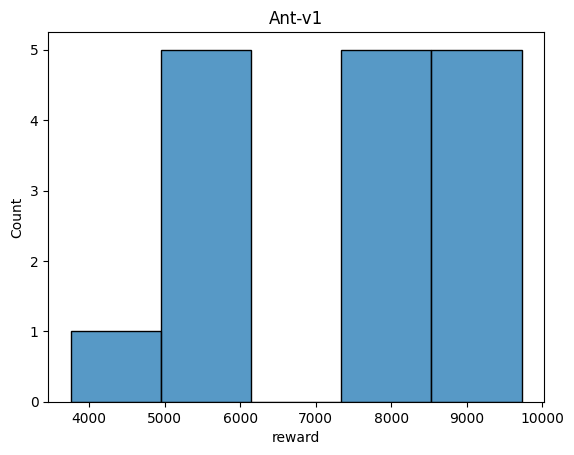

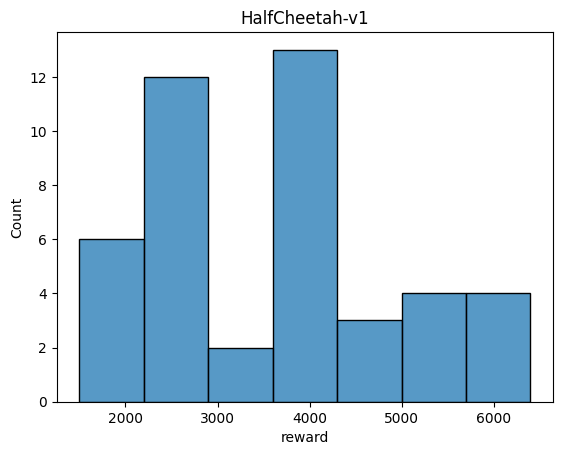

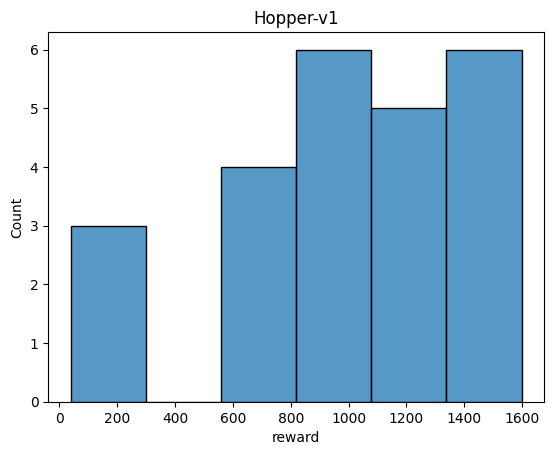

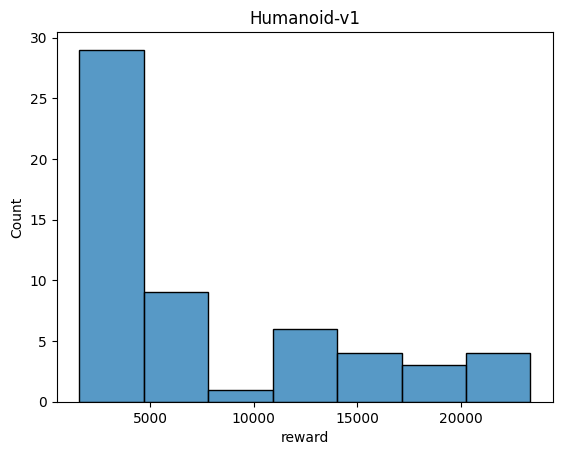

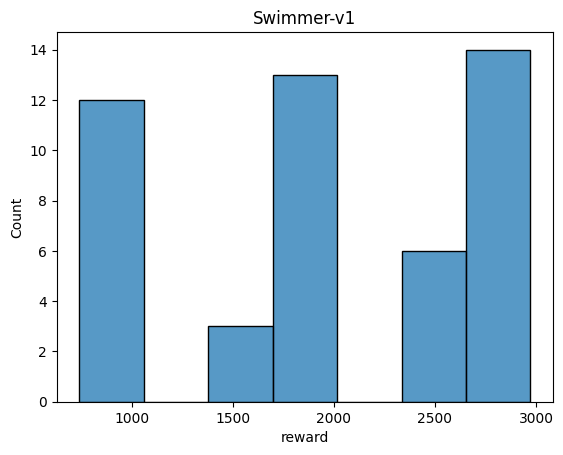

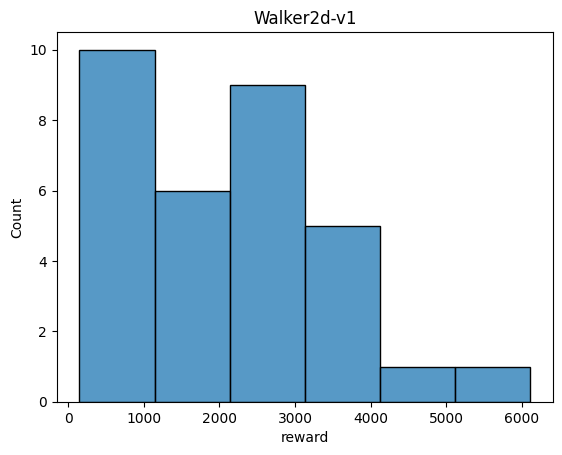

In [6]:
for task, tdf in all_data.groupby("task"):
    sns.histplot(tdf, x="reward")
    plt.title(task)
    plt.show()

In [9]:
all_data.groupby("task").reward.sum() / 3600

task
Ant-v1             32.233708
HalfCheetah-v1     43.890826
Hopper-v1           6.813321
Humanoid-v1       114.970854
Swimmer-v1         25.914406
Walker2d-v1        18.320203
Name: reward, dtype: float64